In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# On charge les données
tips = sns.load_dataset("tips")



In [12]:
# 1. Aperçu et types
print("1. Aperçu et types")
print(tips.head())
print(tips.columns)
print(tips.dtypes)



1. Aperçu et types
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [13]:
# 2. Statistiques descriptives
print("\n2. Statistiques descriptives")
print(tips[["total_bill", "tip", "size"]].describe())




2. Statistiques descriptives
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [14]:
# 3. Valeurs manquantes
print("\n3. Valeurs manquantes")
print(tips.isnull().sum())




3. Valeurs manquantes
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


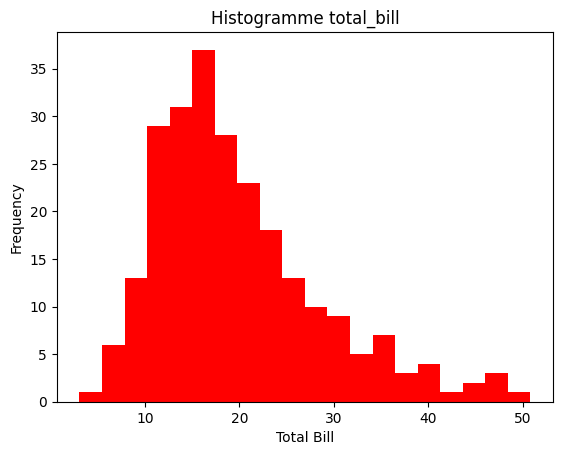

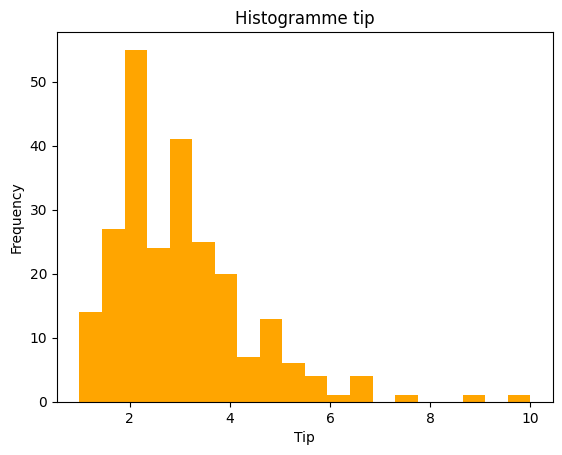

In [15]:
# 4. Histogrammes
tips["total_bill"].plot.hist(bins=20, title="Histogramme total_bill" , color="red")
plt.xlabel("Total Bill")
plt.show()

tips["tip"].plot.hist(bins=20, title="Histogramme tip", color="orange")
plt.xlabel("Tip")
plt.show()



In [16]:
# 5. Moyennes groupées
print("\n5. Moyenne des pourboires par sexe")
print(tips.groupby("sex", observed=True)["tip"].mean())
print("\nMoyenne des pourboires par statut fumeur")
print(tips.groupby("smoker", observed=True)["tip"].mean())
print("\nMoyenne des pourboires par jour")
print(tips.groupby("day", observed=True)["tip"].mean())




5. Moyenne des pourboires par sexe
sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

Moyenne des pourboires par statut fumeur
smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

Moyenne des pourboires par jour
day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


In [17]:
# 6. Pourboire moyen par taille de table
print("\n6. Moyenne des pourboires par taille de table")
print(tips.groupby("size")["tip"].mean())




6. Moyenne des pourboires par taille de table
size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64


In [18]:
# 7. Table croisée
print("\n7. Table croisée day/time")
print(pd.pivot_table(tips, values="tip", index="day", columns="time", observed=True))



7. Table croisée day/time
time     Lunch    Dinner
day                     
Thur  2.767705  3.000000
Fri   2.382857  2.940000
Sat        NaN  2.993103
Sun        NaN  3.255132


In [19]:
# 8. Proportion de fumeurs
print("\n8. Pourcentage de fumeurs")
print(tips["smoker"].value_counts(normalize=True) * 100)
print("\nPar sexe :")
print(tips.groupby("sex", observed=True)["smoker"].value_counts(normalize=True) * 100)




8. Pourcentage de fumeurs
smoker
No     61.885246
Yes    38.114754
Name: proportion, dtype: float64

Par sexe :
sex     smoker
Male    No        61.783439
        Yes       38.216561
Female  No        62.068966
        Yes       37.931034
Name: proportion, dtype: float64


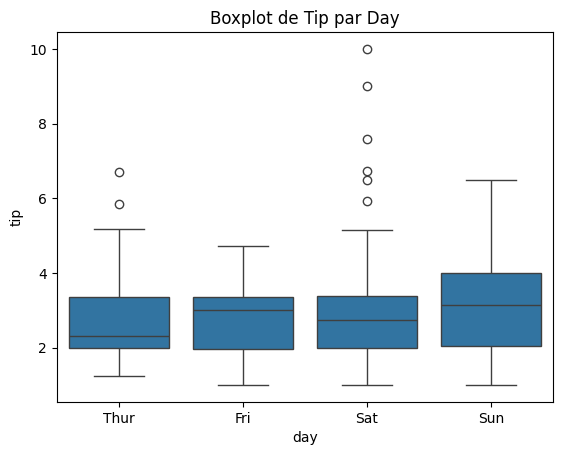

In [20]:
# 9. Boxplot de tip par day
sns.boxplot(data=tips, x="day", y="tip")
plt.title("Boxplot de Tip par Day")
plt.show()



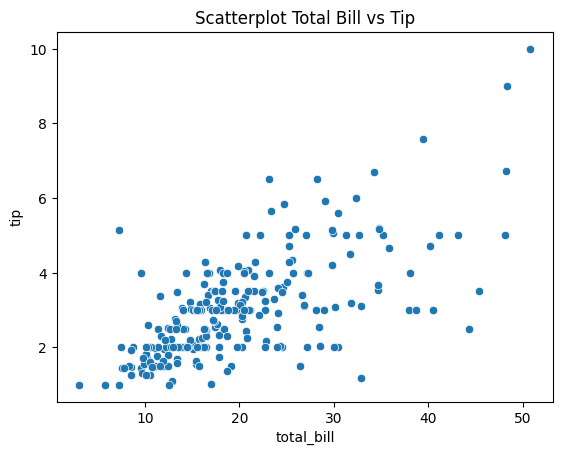

In [21]:
# 10. Scatterplot entre total_bill et tip
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Scatterplot Total Bill vs Tip")
plt.show()



In [22]:
# 11. Corrélations linéaires
print("\n11. Corrélation total_bill vs tip")
corr1, pval1 = stats.pearsonr(tips["total_bill"], tips["tip"])
print(f"Corrélation = {corr1:.2f}, p-value = {pval1:.4f}")

print("\nCorrélation size vs tip")
corr2, pval2 = stats.pearsonr(tips["size"], tips["tip"])
print(f"Corrélation = {corr2:.2f}, p-value = {pval2:.4f}")




11. Corrélation total_bill vs tip
Corrélation = 0.68, p-value = 0.0000

Corrélation size vs tip
Corrélation = 0.49, p-value = 0.0000


In [23]:
# 12. Corrélations catégorielles
print("\n12. Moyenne des tips par catégorie")
for cat in ["sex", "smoker", "day", "time"]:
    print(f"\nPar {cat} :")
    print(tips.groupby(cat)["tip"].mean())




12. Moyenne des tips par catégorie

Par sex :
sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

Par smoker :
smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

Par day :
day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

Par time :
time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64


C:\Users\Nguekeu\AppData\Local\Temp\ipykernel_23104\2412377095.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby(cat)["tip"].mean())


In [24]:
# 13. Différence significative fumeur/non-fumeur
print("\n13. Test fumeurs vs non-fumeurs")
smoker_tip = tips[tips["smoker"] == "Yes"]["tip"]
non_smoker_tip = tips[tips["smoker"] == "No"]["tip"]
tstat, pval = stats.ttest_ind(smoker_tip, non_smoker_tip)
print(f"t-statistic = {tstat:.2f}, p-value = {pval:.4f}")




13. Test fumeurs vs non-fumeurs
t-statistic = 0.09, p-value = 0.9266


In [25]:
# 14. Tip proportionnel
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
print("\n14. Tip proportionnel (tip_pct)")
print(tips["tip_pct"].mean(), tips["tip_pct"].std())




14. Tip proportionnel (tip_pct)
0.16080258172250472 0.06107220419157192


In [26]:
# 15. Qui donne le plus en proportion
print("\n15. Tip_pct par catégorie")
for cat in ["sex", "smoker", "day"]:
    print(f"\nPar {cat} :")
    print(tips.groupby(cat)["tip_pct"].mean())




15. Tip_pct par catégorie

Par sex :
sex
Male      0.157651
Female    0.166491
Name: tip_pct, dtype: float64

Par smoker :
smoker
Yes    0.163196
No     0.159328
Name: tip_pct, dtype: float64

Par day :
day
Thur    0.161276
Fri     0.169913
Sat     0.153152
Sun     0.166897
Name: tip_pct, dtype: float64


C:\Users\Nguekeu\AppData\Local\Temp\ipykernel_23104\1288552654.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby(cat)["tip_pct"].mean())


In [27]:
# 16. Conversion en NumPy
arr = tips[["total_bill", "tip"]].to_numpy()
print("\n16. Conversion NumPy")
print("Shape:", arr.shape)  # (n_lignes, 2)
print("Chaque ligne = [total_bill, tip]")




16. Conversion NumPy
Shape: (244, 2)
Chaque ligne = [total_bill, tip]


In [28]:
# 17. Calculs vectorisés
print("\n17. Calculs NumPy")
tips_np = tips["tip"].to_numpy()
total_np = tips["total_bill"].to_numpy()
print("Moyenne:", tips_np.mean())
print("Max:", tips_np.max())
print("Somme si total_bill > 30:", tips_np[total_np > 30].sum())




17. Calculs NumPy
Moyenne: 2.99827868852459
Max: 10.0
Somme si total_bill > 30: 146.66


In [29]:
# 18 
print("\n18. Tips pour size >= 4")
print(tips["tip"][tips["size"].to_numpy() >= 4].mean())




18. Tips pour size >= 4
4.218478260869565


In [30]:
# 19 
print("\n19. Tip > 20% de l'addition")
high_tip = tips[tips["tip_pct"] > 0.2]
print(f"{len(high_tip)} cas concernés")




19. Tip > 20% de l'addition
39 cas concernés


In [31]:
# 20 
def tip_level(tip):
    if tip < 2:
        return "faible"
    elif tip < 5:
        return "moyen"
    else:
        return "élevé"

tips["tip_level"] = tips["tip"].apply(tip_level)
print("\n20. Répartition des catégories tip_level")
print(tips["tip_level"].value_counts())




20. Répartition des catégories tip_level
tip_level
moyen     171
faible     45
élevé      28
Name: count, dtype: int64


In [32]:
# 21 
tips["is_large_party"] = np.where(tips["size"] >= 4, True, False)
print("\n21. is_large_party")
print(tips["is_large_party"].value_counts())




21. is_large_party
is_large_party
False    198
True      46
Name: count, dtype: int64


In [33]:
# 22. Tri NumPy
sorted_total = np.sort(tips["total_bill"].to_numpy())
print("\n22. 10 plus grandes additions")
print(sorted_total[-10:])




22. 10 plus grandes additions
[40.17 40.55 41.19 43.11 44.3  45.35 48.17 48.27 48.33 50.81]


In [34]:
# 23 
print("\n23. Écart-type de tip_pct par jour")
stds = tips.groupby("day")["tip_pct"].std()
print(stds)
print(f"Jour le plus variable : {stds.idxmax()}")




23. Écart-type de tip_pct par jour
day
Thur    0.038652
Fri     0.047665
Sat     0.051293
Sun     0.084739
Name: tip_pct, dtype: float64
Jour le plus variable : Sun


C:\Users\Nguekeu\AppData\Local\Temp\ipykernel_23104\3498434312.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = tips.groupby("day")["tip_pct"].std()


In [35]:
# 24 
mask = (tips["tip"] > 5) & (tips["time"] == "Dinner") & (tips["smoker"] == "Yes")
print("\n24. Nombre de cas avec tip > 5, Dinner, fumeur :")
print(mask.sum())




24. Nombre de cas avec tip > 5, Dinner, fumeur :
6


In [36]:
# 25 
men = tips[tips["sex"] == "Male"]
women = tips[tips["sex"] == "Female"]
merged = pd.concat([men, women])
print("\n25. Concaténation index conservé ?")
print(merged.index.equals(pd.RangeIndex(start=0, stop=len(merged))))



25. Concaténation index conservé ?
False
